# AI_MovieSuggestions
1. Demographic Filtering
1. Content Based Filtering
1. Collaborative Filtering  
  
[Data Source](https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system)  

# 1. Demographic Filtering

In [2]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [7]:
df1.shape, df2.shape 

((4803, 4), (4803, 20))

In [9]:
df1['title'].equals(df2['title'])

True

In [10]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [13]:
df1.columns = ['id', 'title', 'cast', 'crew']
df1.columns

Index(['id', 'title', 'cast', 'crew'], dtype='object')

In [14]:
df1[['id', 'cast', 'crew']]

,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...
4798,9367,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [15]:
df2 = df2.merge(df1[['id', 'cast', 'crew']], on = 'id')

In [16]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


Movie 1: Rating is 10/10 -> Rated by 5 people  
Movie 2: Rating is 8/10 -> Rated by 500 people

In [17]:
C=df2['vote_average'].mean()
C

6.092171559442016

In [18]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [21]:
q_movies=df2.copy().loc[df2['vote_count']>= m]
q_movies.shape

(481, 22)

In [23]:
q_movies['vote_count'].sort_values()

2585     1840
195      1851
2454     1859
597      1862
1405     1864
        ...  
788     10995
16      11776
0       11800
65      12002
96      13752
Name: vote_count, Length: 481, dtype: int64

In [24]:
def weighted_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    return(v/(v+m)*R) +(m/(m+v)*C)

In [25]:
q_movies['score']=q_movies.apply(weighted_rating, axis=1) #row
q_movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396


In [27]:
q_movies = q_movies.sort_values('score', ascending=False)
q_movies[['title','vote_average', 'vote_count', 'score']].head(10)

,title,vote_average,vote_count,score
1881,The Shawshank Redemption,8.5,8205,8.059258
662,Fight Club,8.3,9413,7.939256
65,The Dark Knight,8.2,12002,7.920020
3232,Pulp Fiction,8.3,8428,7.904645
96,Inception,8.1,13752,7.863239
3337,The Godfather,8.4,5893,7.851236
95,Interstellar,8.1,10867,7.809479
809,Forrest Gump,8.2,7927,7.803188
329,The Lord of the Rings: The Return of the King,8.1,8064,7.727243
1990,The Empire Strikes Back,8.2,5879,7.697884


Text(0.5, 1.0, 'Popular Movies')

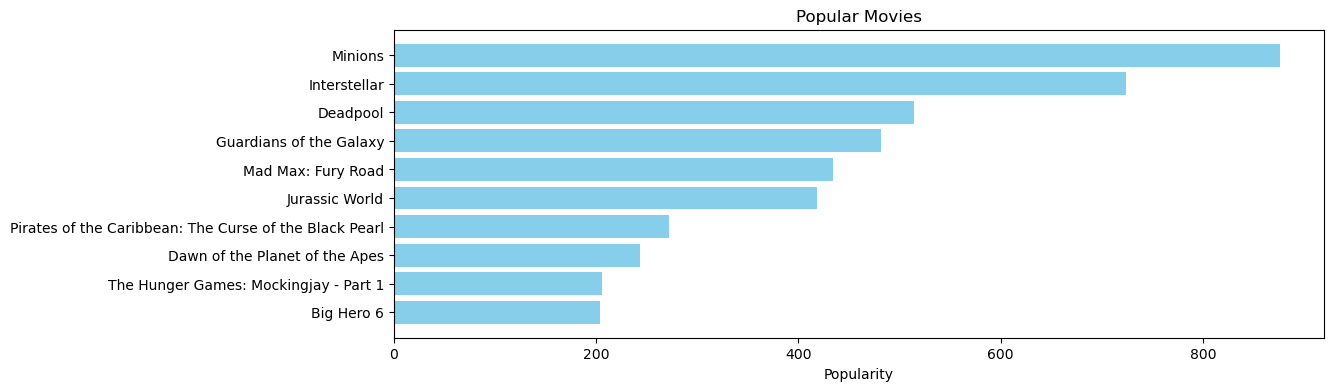

In [29]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(10),pop['popularity'].head(10), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

# 2. Content Based Filtering

In [31]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

### Bag Of Words - BOW

Sentence1 : I am a boy  
Sentence2 : I am a girl  

I(2), am(2), a(2), boy(1), girl(1)  

|            | I | am | a | boy | girl |
|------------|---|----|----|-----|------|
| Sentence1  | 1 | 1  | 1  | 1   | 0    |
| Sentence2  | 1 | 1  | 1  | 0   | 1    |

(1,1,1,1,0) for Sentence1  
(1,1,1,0,1) for Sentence2  

##### => Feature vectorization

100 Documents  
10,000 unique words across all documents  

100 * 10,000 = 1,000,000  

|         | Word1 | Word2 | Word3 | Word4 | ... | Word10000 |
|---------|-------|-------|-------|-------|------|-----------|
| Doc1    | 1     | 1     | 3     | 0     | ...  | 1         |
| Doc2    | 2     | 2     | 1     | 3     | ...  | 1         |
| Doc3    | 3     | 0     | 3     | 1     | ...  | 1         |
| ...     | ...   | ...   | ...   | ...   | ...  | ...       |
| Doc100  | 2     | 4     | 0     | 10    | ...  | 3         |

1. TfidfVectorizer (TF-IDF-based vectorization)  
2. CountVectorizer  

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')  
#stop_words = 'english' ==> Excludes meaningless words like "The" and "A"

In [35]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [37]:
df2['overview'].isnull().values.any()

True

In [38]:
df2['overview'] = df2['overview'].fillna('')

In [39]:
tfidf_matrix=tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [40]:
tfidf_matrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [41]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.01488159, 0.        ,
        0.        ],
       ...,
       [0.        , 0.02160533, 0.01488159, ..., 1.        , 0.01609091,
        0.00701914],
       [0.        , 0.        , 0.        , ..., 0.01609091, 1.        ,
        0.01171696],
       [0.        , 0.        , 0.        , ..., 0.00701914, 0.01171696,
        1.        ]])

|            |  sentence1 | sentence2 | sentence3 |
|------------|------------|-----------|-----------|
|sentence1   |    1       |    0.3    |    0.8    |
|sentence2   |    0.3     |    1      |    0.5    |
|sentence3   |    0.8     |    0.5    |    1      |

In [42]:
cosine_sim.shape

(4803, 4803)

In [43]:
indices = pd.Series(df2.index, index = df2['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [46]:
indices['The Dark Knight Rises']

3

In [48]:
df2.iloc[[3]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [70]:
# Given a movie title, return the top 10 most similar movies based on cosine similarity.
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key= lambda x:x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices = [i[0]for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [51]:
test_idx = indices['The Dark Knight Rises'] #Obtain the index of the movie based on the movie title from the entire dataset.
test_idx

3

In [55]:
cosine_sim[3]

array([0.02499512, 0.        , 0.        , ..., 0.03386366, 0.04275232,
       0.02269198])

In [57]:
test_sim_scores= list(enumerate(cosine_sim[3])) #Get the data corresponding to idx in the cosine similarity matrix (cosine_sim) in the form of (idx, similarity).

In [59]:
test_sim_scores = sorted(test_sim_scores, key= lambda x:x[1], reverse=True) #Sort in descending order based on cosine similarity.
test_sim_scores[1:11] #Slice to get 10 recommended movies excluding the movie itself.

[(65, 0.3015117659166547),
 (299, 0.2985704525539681),
 (428, 0.2878505467001693),
 (1359, 0.26446092382799496),
 (3854, 0.1854500300656145),
 (119, 0.167996261998507),
 (2507, 0.1668289104335827),
 (9, 0.13374009066555226),
 (1181, 0.1321970213847681),
 (210, 0.13045537014449815)]

In [62]:
#Extract the index information of the top 10 recommended movies
test_movie_indices = [i[0]for i in test_sim_scores[1:11]]
test_movie_indices

[65, 299, 428, 1359, 3854, 119, 2507, 9, 1181, 210]

In [66]:
#Extract movie titles using the index information
df2['title'].iloc[test_movie_indices]

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [68]:
df2['title'][:20]

0                                          Avatar
1        Pirates of the Caribbean: At World's End
2                                         Spectre
3                           The Dark Knight Rises
4                                     John Carter
5                                    Spider-Man 3
6                                         Tangled
7                         Avengers: Age of Ultron
8          Harry Potter and the Half-Blood Prince
9              Batman v Superman: Dawn of Justice
10                               Superman Returns
11                              Quantum of Solace
12     Pirates of the Caribbean: Dead Man's Chest
13                                The Lone Ranger
14                                   Man of Steel
15       The Chronicles of Narnia: Prince Caspian
16                                   The Avengers
17    Pirates of the Caribbean: On Stranger Tides
18                                 Men in Black 3
19      The Hobbit: The Battle of the Five Armies


In [71]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object

# 3. Collaborative Filtering

In [72]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [73]:
df2.loc[0,'genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [74]:
s1 = [{"id": 28, "name": "Action"}]
s2 = '[{"id": 28, "name": "Action"}]'

In [75]:
type(s1), type(s2)

(list, str)

In [85]:
from ast import literal_eval
s2 = literal_eval(s2)
s2, type(s2)

ValueError: malformed node or string: [{'id': 28, 'name': 'Action'}]

In [84]:
features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

ValueError: malformed node or string: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id': 3, 'character': 'Neytiri', 'credit_id': '52fe48009251416c750ac9cb', 'gender': 1, 'id': 8691, 'name': 'Zoe Saldana', 'order': 1}, {'cast_id': 25, 'character': 'Dr. Grace Augustine', 'credit_id': '52fe48009251416c750aca39', 'gender': 1, 'id': 10205, 'name': 'Sigourney Weaver', 'order': 2}, {'cast_id': 4, 'character': 'Col. Quaritch', 'credit_id': '52fe48009251416c750ac9cf', 'gender': 2, 'id': 32747, 'name': 'Stephen Lang', 'order': 3}, {'cast_id': 5, 'character': 'Trudy Chacon', 'credit_id': '52fe48009251416c750ac9d3', 'gender': 1, 'id': 17647, 'name': 'Michelle Rodriguez', 'order': 4}, {'cast_id': 8, 'character': 'Selfridge', 'credit_id': '52fe48009251416c750ac9e1', 'gender': 2, 'id': 1771, 'name': 'Giovanni Ribisi', 'order': 5}, {'cast_id': 7, 'character': 'Norm Spellman', 'credit_id': '52fe48009251416c750ac9dd', 'gender': 2, 'id': 59231, 'name': 'Joel David Moore', 'order': 6}, {'cast_id': 9, 'character': 'Moat', 'credit_id': '52fe48009251416c750ac9e5', 'gender': 1, 'id': 30485, 'name': 'CCH Pounder', 'order': 7}, {'cast_id': 11, 'character': 'Eytukan', 'credit_id': '52fe48009251416c750ac9ed', 'gender': 2, 'id': 15853, 'name': 'Wes Studi', 'order': 8}, {'cast_id': 10, 'character': "Tsu'Tey", 'credit_id': '52fe48009251416c750ac9e9', 'gender': 2, 'id': 10964, 'name': 'Laz Alonso', 'order': 9}, {'cast_id': 12, 'character': 'Dr. Max Patel', 'credit_id': '52fe48009251416c750ac9f1', 'gender': 2, 'id': 95697, 'name': 'Dileep Rao', 'order': 10}, {'cast_id': 13, 'character': 'Lyle Wainfleet', 'credit_id': '52fe48009251416c750ac9f5', 'gender': 2, 'id': 98215, 'name': 'Matt Gerald', 'order': 11}, {'cast_id': 32, 'character': 'Private Fike', 'credit_id': '52fe48009251416c750aca5b', 'gender': 2, 'id': 154153, 'name': 'Sean Anthony Moran', 'order': 12}, {'cast_id': 33, 'character': 'Cryo Vault Med Tech', 'credit_id': '52fe48009251416c750aca5f', 'gender': 2, 'id': 397312, 'name': 'Jason Whyte', 'order': 13}, {'cast_id': 34, 'character': 'Venture Star Crew Chief', 'credit_id': '52fe48009251416c750aca63', 'gender': 2, 'id': 42317, 'name': 'Scott Lawrence', 'order': 14}, {'cast_id': 35, 'character': 'Lock Up Trooper', 'credit_id': '52fe48009251416c750aca67', 'gender': 2, 'id': 986734, 'name': 'Kelly Kilgour', 'order': 15}, {'cast_id': 36, 'character': 'Shuttle Pilot', 'credit_id': '52fe48009251416c750aca6b', 'gender': 0, 'id': 1207227, 'name': 'James Patrick Pitt', 'order': 16}, {'cast_id': 37, 'character': 'Shuttle Co-Pilot', 'credit_id': '52fe48009251416c750aca6f', 'gender': 0, 'id': 1180936, 'name': 'Sean Patrick Murphy', 'order': 17}, {'cast_id': 38, 'character': 'Shuttle Crew Chief', 'credit_id': '52fe48009251416c750aca73', 'gender': 2, 'id': 1019578, 'name': 'Peter Dillon', 'order': 18}, {'cast_id': 39, 'character': 'Tractor Operator / Troupe', 'credit_id': '52fe48009251416c750aca77', 'gender': 0, 'id': 91443, 'name': 'Kevin Dorman', 'order': 19}, {'cast_id': 40, 'character': 'Dragon Gunship Pilot', 'credit_id': '52fe48009251416c750aca7b', 'gender': 2, 'id': 173391, 'name': 'Kelson Henderson', 'order': 20}, {'cast_id': 41, 'character': 'Dragon Gunship Gunner', 'credit_id': '52fe48009251416c750aca7f', 'gender': 0, 'id': 1207236, 'name': 'David Van Horn', 'order': 21}, {'cast_id': 42, 'character': 'Dragon Gunship Navigator', 'credit_id': '52fe48009251416c750aca83', 'gender': 0, 'id': 215913, 'name': 'Jacob Tomuri', 'order': 22}, {'cast_id': 43, 'character': 'Suit #1', 'credit_id': '52fe48009251416c750aca87', 'gender': 0, 'id': 143206, 'name': 'Michael Blain-Rozgay', 'order': 23}, {'cast_id': 44, 'character': 'Suit #2', 'credit_id': '52fe48009251416c750aca8b', 'gender': 2, 'id': 169676, 'name': 'Jon Curry', 'order': 24}, {'cast_id': 46, 'character': 'Ambient Room Tech', 'credit_id': '52fe48009251416c750aca8f', 'gender': 0, 'id': 1048610, 'name': 'Luke Hawker', 'order': 25}, {'cast_id': 47, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48009251416c750aca93', 'gender': 0, 'id': 42288, 'name': 'Woody Schultz', 'order': 26}, {'cast_id': 48, 'character': 'Horse Clan Leader', 'credit_id': '52fe48009251416c750aca97', 'gender': 2, 'id': 68278, 'name': 'Peter Mensah', 'order': 27}, {'cast_id': 49, 'character': 'Link Room Tech', 'credit_id': '52fe48009251416c750aca9b', 'gender': 0, 'id': 1207247, 'name': 'Sonia Yee', 'order': 28}, {'cast_id': 50, 'character': 'Basketball Avatar / Troupe', 'credit_id': '52fe48009251416c750aca9f', 'gender': 1, 'id': 1207248, 'name': 'Jahnel Curfman', 'order': 29}, {'cast_id': 51, 'character': 'Basketball Avatar', 'credit_id': '52fe48009251416c750acaa3', 'gender': 0, 'id': 89714, 'name': 'Ilram Choi', 'order': 30}, {'cast_id': 52, 'character': "Na'vi Child", 'credit_id': '52fe48009251416c750acaa7', 'gender': 0, 'id': 1207249, 'name': 'Kyla Warren', 'order': 31}, {'cast_id': 53, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaab', 'gender': 0, 'id': 1207250, 'name': 'Lisa Roumain', 'order': 32}, {'cast_id': 54, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaaf', 'gender': 1, 'id': 83105, 'name': 'Debra Wilson', 'order': 33}, {'cast_id': 57, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabb', 'gender': 0, 'id': 1207253, 'name': 'Chris Mala', 'order': 34}, {'cast_id': 55, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab3', 'gender': 0, 'id': 1207251, 'name': 'Taylor Kibby', 'order': 35}, {'cast_id': 56, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab7', 'gender': 0, 'id': 1207252, 'name': 'Jodie Landau', 'order': 36}, {'cast_id': 58, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabf', 'gender': 0, 'id': 1207254, 'name': 'Julie Lamm', 'order': 37}, {'cast_id': 59, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac3', 'gender': 0, 'id': 1207257, 'name': 'Cullen B. Madden', 'order': 38}, {'cast_id': 60, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac7', 'gender': 0, 'id': 1207259, 'name': 'Joseph Brady Madden', 'order': 39}, {'cast_id': 61, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacb', 'gender': 0, 'id': 1207262, 'name': 'Frankie Torres', 'order': 40}, {'cast_id': 62, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacf', 'gender': 1, 'id': 1158600, 'name': 'Austin Wilson', 'order': 41}, {'cast_id': 63, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad3', 'gender': 1, 'id': 983705, 'name': 'Sara Wilson', 'order': 42}, {'cast_id': 64, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad7', 'gender': 0, 'id': 1207263, 'name': 'Tamica Washington-Miller', 'order': 43}, {'cast_id': 65, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadb', 'gender': 1, 'id': 1145098, 'name': 'Lucy Briant', 'order': 44}, {'cast_id': 66, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadf', 'gender': 2, 'id': 33305, 'name': 'Nathan Meister', 'order': 45}, {'cast_id': 67, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae3', 'gender': 0, 'id': 1207264, 'name': 'Gerry Blair', 'order': 46}, {'cast_id': 68, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae7', 'gender': 2, 'id': 33311, 'name': 'Matthew Chamberlain', 'order': 47}, {'cast_id': 69, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaeb', 'gender': 0, 'id': 1207265, 'name': 'Paul Yates', 'order': 48}, {'cast_id': 70, 'character': 'Op Center Duty Officer', 'credit_id': '52fe48019251416c750acaef', 'gender': 0, 'id': 1207266, 'name': 'Wray Wilson', 'order': 49}, {'cast_id': 71, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaf3', 'gender': 2, 'id': 54492, 'name': 'James Gaylyn', 'order': 50}, {'cast_id': 72, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaf7', 'gender': 0, 'id': 1207267, 'name': 'Melvin Leno Clark III', 'order': 51}, {'cast_id': 73, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acafb', 'gender': 0, 'id': 1207268, 'name': 'Carvon Futrell', 'order': 52}, {'cast_id': 74, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaff', 'gender': 0, 'id': 1207269, 'name': 'Brandon Jelkes', 'order': 53}, {'cast_id': 75, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb03', 'gender': 0, 'id': 1207270, 'name': 'Micah Moch', 'order': 54}, {'cast_id': 76, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb07', 'gender': 0, 'id': 1207271, 'name': 'Hanniyah Muhammad', 'order': 55}, {'cast_id': 77, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0b', 'gender': 0, 'id': 1207272, 'name': 'Christopher Nolen', 'order': 56}, {'cast_id': 78, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0f', 'gender': 0, 'id': 1207273, 'name': 'Christa Oliver', 'order': 57}, {'cast_id': 79, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb13', 'gender': 0, 'id': 1207274, 'name': 'April Marie Thomas', 'order': 58}, {'cast_id': 80, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb17', 'gender': 0, 'id': 1207275, 'name': 'Bravita A. Threatt', 'order': 59}, {'cast_id': 81, 'character': 'Mining Chief (uncredited)', 'credit_id': '52fe48019251416c750acb1b', 'gender': 0, 'id': 1207276, 'name': 'Colin Bleasdale', 'order': 60}, {'cast_id': 82, 'character': 'Veteran Miner (uncredited)', 'credit_id': '52fe48019251416c750acb1f', 'gender': 0, 'id': 107969, 'name': 'Mike Bodnar', 'order': 61}, {'cast_id': 83, 'character': 'Richard (uncredited)', 'credit_id': '52fe48019251416c750acb23', 'gender': 0, 'id': 1207278, 'name': 'Matt Clayton', 'order': 62}, {'cast_id': 84, 'character': "Nav'i (uncredited)", 'credit_id': '52fe48019251416c750acb27', 'gender': 1, 'id': 147898, 'name': 'Nicole Dionne', 'order': 63}, {'cast_id': 85, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2b', 'gender': 0, 'id': 1207280, 'name': 'Jamie Harrison', 'order': 64}, {'cast_id': 86, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2f', 'gender': 0, 'id': 1207281, 'name': 'Allan Henry', 'order': 65}, {'cast_id': 87, 'character': 'Ground Technician (uncredited)', 'credit_id': '52fe48019251416c750acb33', 'gender': 2, 'id': 1207282, 'name': 'Anthony Ingruber', 'order': 66}, {'cast_id': 88, 'character': 'Flight Crew Mechanic (uncredited)', 'credit_id': '52fe48019251416c750acb37', 'gender': 0, 'id': 1207283, 'name': 'Ashley Jeffery', 'order': 67}, {'cast_id': 14, 'character': 'Samson Pilot', 'credit_id': '52fe48009251416c750ac9f9', 'gender': 0, 'id': 98216, 'name': 'Dean Knowsley', 'order': 68}, {'cast_id': 89, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb3b', 'gender': 0, 'id': 1201399, 'name': 'Joseph Mika-Hunt', 'order': 69}, {'cast_id': 90, 'character': 'Banshee (uncredited)', 'credit_id': '52fe48019251416c750acb3f', 'gender': 0, 'id': 236696, 'name': 'Terry Notary', 'order': 70}, {'cast_id': 91, 'character': 'Soldier (uncredited)', 'credit_id': '52fe48019251416c750acb43', 'gender': 0, 'id': 1207287, 'name': 'Kai Pantano', 'order': 71}, {'cast_id': 92, 'character': 'Blast Technician (uncredited)', 'credit_id': '52fe48019251416c750acb47', 'gender': 0, 'id': 1207288, 'name': 'Logan Pithyou', 'order': 72}, {'cast_id': 93, 'character': 'Vindum Raah (uncredited)', 'credit_id': '52fe48019251416c750acb4b', 'gender': 0, 'id': 1207289, 'name': 'Stuart Pollock', 'order': 73}, {'cast_id': 94, 'character': 'Hero (uncredited)', 'credit_id': '52fe48019251416c750acb4f', 'gender': 0, 'id': 584868, 'name': 'Raja', 'order': 74}, {'cast_id': 95, 'character': 'Ops Centreworker (uncredited)', 'credit_id': '52fe48019251416c750acb53', 'gender': 0, 'id': 1207290, 'name': 'Gareth Ruck', 'order': 75}, {'cast_id': 96, 'character': 'Engineer (uncredited)', 'credit_id': '52fe48019251416c750acb57', 'gender': 0, 'id': 1062463, 'name': 'Rhian Sheehan', 'order': 76}, {'cast_id': 97, 'character': "Col. Quaritch's Mech Suit (uncredited)", 'credit_id': '52fe48019251416c750acb5b', 'gender': 0, 'id': 60656, 'name': 'T. J. Storm', 'order': 77}, {'cast_id': 98, 'character': 'Female Marine (uncredited)', 'credit_id': '52fe48019251416c750acb5f', 'gender': 0, 'id': 1207291, 'name': 'Jodie Taylor', 'order': 78}, {'cast_id': 99, 'character': 'Ikran Clan Leader (uncredited)', 'credit_id': '52fe48019251416c750acb63', 'gender': 1, 'id': 1186027, 'name': 'Alicia Vela-Bailey', 'order': 79}, {'cast_id': 100, 'character': 'Geologist (uncredited)', 'credit_id': '52fe48019251416c750acb67', 'gender': 0, 'id': 1207292, 'name': 'Richard Whiteside', 'order': 80}, {'cast_id': 101, 'character': "Na'vi (uncredited)", 'credit_id': '52fe48019251416c750acb6b', 'gender': 0, 'id': 103259, 'name': 'Nikie Zambo', 'order': 81}, {'cast_id': 102, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48019251416c750acb6f', 'gender': 1, 'id': 42286, 'name': 'Julene Renee', 'order': 82}]

In [87]:
df2.loc[0,'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [88]:
#Extract the 'crew' information specifically for directors
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [89]:
df2['director'] = df2['crew'].apply(get_director)
df2['director']

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

In [91]:
df2.loc[0,'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [92]:
df2.loc[0,'genres']

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [93]:
df2.loc[0, 'keywords']

[{'id': 1463, 'name': 'culture clash'},
 {'id': 2964, 'name': 'future'},
 {'id': 3386, 'name': 'space war'},
 {'id': 3388, 'name': 'space colony'},
 {'id': 3679, 'name': 'society'},
 {'id': 3801, 'name': 'space travel'},
 {'id': 9685, 'name': 'futuristic'},
 {'id': 9840, 'name': 'romance'},
 {'id': 9882, 'name': 'space'},
 {'id': 9951, 'name': 'alien'},
 {'id': 10148, 'name': 'tribe'},
 {'id': 10158, 'name': 'alien planet'},
 {'id': 10987, 'name': 'cgi'},
 {'id': 11399, 'name': 'marine'},
 {'id': 13065, 'name': 'soldier'},
 {'id': 14643, 'name': 'battle'},
 {'id': 14720, 'name': 'love affair'},
 {'id': 165431, 'name': 'anti war'},
 {'id': 193554, 'name': 'power relations'},
 {'id': 206690, 'name': 'mind and soul'},
 {'id': 209714, 'name': '3d'}]

In [94]:
#Extract only the 'name' values from the first 3 records
def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        if len(names)>3:
            names = names[:3]
        return names
    return []

In [95]:
fetures = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [96]:
df2[['title','cast','director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [109]:
def clean_data(x):
    if isinstance(x, list):
        return[str.lower(i.replace(' ', '')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [113]:
features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [114]:
df2[['title','cast','director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[cultureclash, future, spacewar]","[action, adventure, fantasy]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[ocean, drugabuse, exoticisland]","[adventure, fantasy, action]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[spy, basedonnovel, secretagent]","[action, adventure, crime]"


In [115]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)
df2['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein edwardb...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton danielhsia 
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

In [116]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])
count_matrix

<4803x11520 sparse matrix of type '<class 'numpy.int64'>'
	with 42935 stored elements in Compressed Sparse Row format>

In [118]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2 = cosine_similarity(count_matrix,count_matrix)
cosine_sim2

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [121]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [122]:
get_recommendations('The Dark Knight Rises',cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [123]:
get_recommendations('Up',cosine_sim2)

231                                        Monsters, Inc.
1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
3114                                          Elsa & Fred
1580                                          The Nut Job
3670                                      Running Forever
4709                            A Charlie Brown Christmas
40                                                 Cars 2
42                                            Toy Story 3
77                                             Inside Out
Name: title, dtype: object

In [124]:
get_recommendations('The Martian',cosine_sim2)

4                    John Carter
95                  Interstellar
365                      Contact
256                    Allegiant
1326                The 5th Wave
1958                 On the Road
3043            End of the Spear
3373    The Other Side of Heaven
3392                       Gerry
3698                   Moby Dick
Name: title, dtype: object

In [125]:
indices['The Martian']

270

In [126]:
df2.loc[270]

index                                                                 270
budget                                                          108000000
genres                                 [drama, adventure, sciencefiction]
homepage                      http://www.foxmovies.com/movies/the-martian
id                                                                 286217
keywords                                       [basedonnovel, mars, nasa]
original_language                                                      en
original_title                                                The Martian
overview                During a manned mission to Mars, Astronaut Mar...
popularity                                                      167.93287
production_companies    [{"name": "Twentieth Century Fox Film Corporat...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2015-09-30
revenue                               

In [127]:
df2.loc[4]

index                                                                   4
budget                                                          260000000
genres                                [action, adventure, sciencefiction]
homepage                             http://movies.disney.com/john-carter
id                                                                  49529
keywords                                  [basedonnovel, mars, medallion]
original_language                                                      en
original_title                                                John Carter
overview                John Carter is a war-weary, former military ca...
popularity                                                      43.926995
production_companies          [{"name": "Walt Disney Pictures", "id": 2}]
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2012-03-07
revenue                               

In [128]:
get_recommendations('The Avengers',cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
169     Captain America: The First Avenger
174                    The Incredible Hulk
85     Captain America: The Winter Soldier
31                              Iron Man 3
33                   X-Men: The Last Stand
68                                Iron Man
94                 Guardians of the Galaxy
Name: title, dtype: object

In [130]:
import pickle

In [129]:
df2.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,soup
0,0,237000000,"[action, adventure, fantasy]",http://www.avatarmovie.com/,19995,"[cultureclash, future, spacewar]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[samworthington, zoesaldana, sigourneyweaver]","[stephene.rivkin, rickcarter, christopherboyes]",jamescameron,cultureclash future spacewar samworthington zo...
1,1,300000000,"[adventure, fantasy, action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drugabuse, exoticisland]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[johnnydepp, orlandobloom, keiraknightley]","[dariuszwolski, goreverbinski, jerrybruckheimer]",goreverbinski,ocean drugabuse exoticisland johnnydepp orland...
2,2,245000000,"[action, adventure, crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, basedonnovel, secretagent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[danielcraig, christophwaltz, léaseydoux]","[thomasnewman, sammendes, annapinnock]",sammendes,spy basedonnovel secretagent danielcraig chris...


In [131]:
movies = df2[['id', 'title']].copy()
movies.head(5)

,id,title
0,19995,Avatar
1,285,Pirates of the Caribbean: At World's End
2,206647,Spectre
3,49026,The Dark Knight Rises
4,49529,John Carter


In [132]:
pickle.dump(movies, open('movies.pickle','wb'))

In [133]:
pickle.dump(cosine_sim2,open('cosine_sim.pickle', 'wb'))